In [3]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = load_digits()

In [5]:
df = pd.DataFrame(data['data'],
                 columns = data['feature_names'])
df['target'] = data['target']
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [6]:
X_train,X_test,y_train,y_test  = train_test_split(data['data'],data['target'],random_state=42,test_size=0.2)
model = KNeighborsClassifier(n_neighbors=5)

In [7]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [8]:
y_pred = model.predict(X_test)


In [9]:
model.score(X_test,y_test)

0.9861111111111112

In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [11]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  0, 38]], dtype=int64)

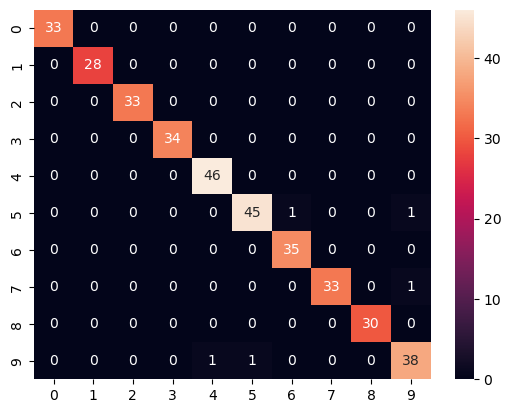

In [12]:
sns.heatmap(cm,annot=True,fmt = '.2g')
plt.show()

In [15]:
import time
max_score = 0
all_score = []
all_k = []
max_score = 0
for i in range(1,16):

    X_train,X_test,y_train,y_test  = train_test_split(data['data'],data['target'],random_state=23,test_size=0.2)
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    
    if score>max_score:
        max_score = score
      
        
        print(f'value of k is:{i} and score is {score}')
        display(clear=True)
    all_score.append(score)  
    all_k.append(i)
    time.sleep(1)


value of k is:1 and score is 0.9888888888888889


In [16]:
import numpy as np

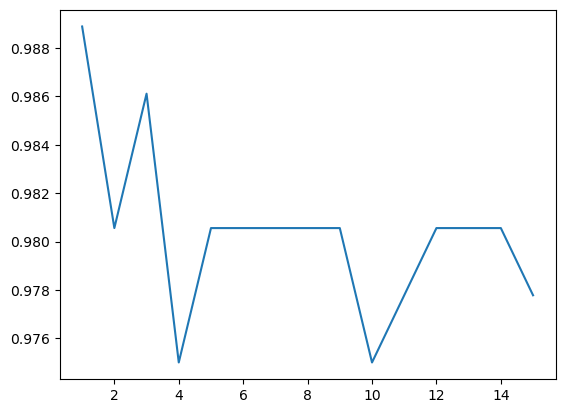

In [18]:
plt.plot(range(1,16),all_score)

k_index = np.argmax(all_score)

plt.annotate(text = f'max score:{round(max(all_score),2)},k is {k_index}',
             xy = (k_index,max(all_score)))
plt.show()

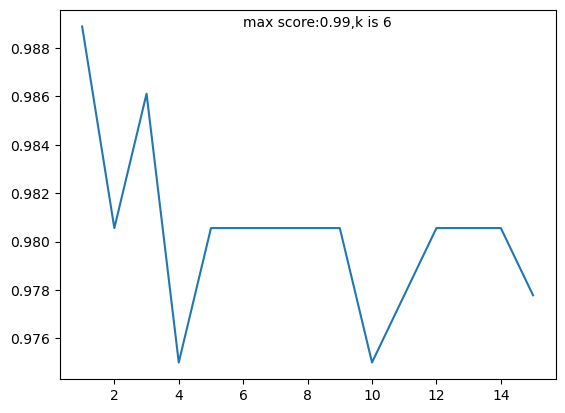

In [19]:
plt.plot(range(1,16),all_score)
k_index = np.argmax(all_score)

plt.annotate(text=f'max score:{round(max(all_score),2)},k is {6}',
             xy = (6,max(all_score)))
plt.show()    